##Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms

#Data Preparation

##Unzip

In [ ]:
#!wget -O data.zip https://drive.google.com/file/d/17hKRarwoz-6il9gpCrYaa5yoAWEc2Cuy/view?usp=share_link
!gdown "17hKRarwoz-6il9gpCrYaa5yoAWEc2Cuy"

Downloading...
From: https://drive.google.com/uc?id=17hKRarwoz-6il9gpCrYaa5yoAWEc2Cuy
To: /content/data.zip
100% 662M/662M [00:11<00:00, 59.8MB/s]


In [ ]:
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: data/
   creating: data/train/
   creating: data/train/cat/
  inflating: data/train/cat/cat-red-cute-mackerel.jpg  
  inflating: data/train/cat/fox-818.jpeg  
  inflating: data/train/cat/HD-wallpaper-tiger-predator-muzzle-big-cat-glance.jpg  
  inflating: data/train/cat/Header_1920x380_FutterergaCC88nzungKatze_Neu.png  
  inflating: data/train/cat/kittens-cat-cat-puppy-rush-45170.jpeg  
  inflating: data/train/cat/kitty-cat-kitten-pet-45201.jpeg  
  inflating: data/train/cat/lynx-white_191971-9235.jpg  
  inflating: data/train/cat/pexels-photo-1031460.jpeg  
  inflating: data/train/cat/pexels-photo-1047369.jpeg  
  inflating: data/train/cat/pexels-photo-1084425.jpeg  
  inflating: data/train/cat/pexels-photo-1170986.jpeg  
  inflating: data/train/cat/pexels-photo-1255093.jpeg  
  inflating: data/train/cat/pexels-photo-134060.jpeg  
  inflating: data/train/cat/pexels-photo-1358845.jpeg  
  inflating: data/train/cat/pexels-photo-1366996.jpeg  
  i

##EDA

In [ ]:
cats_train = glob.glob('/content/data/train/cat'+'/*.jpeg')
cats_val = glob.glob('/content/data/val/cat'+'/*.jpeg')

In [ ]:
dog_train = glob.glob('/content/data/train/dog'+'/*.jpeg')
dog_val = glob.glob('/content/data/val/dog'+'/*.jpeg')

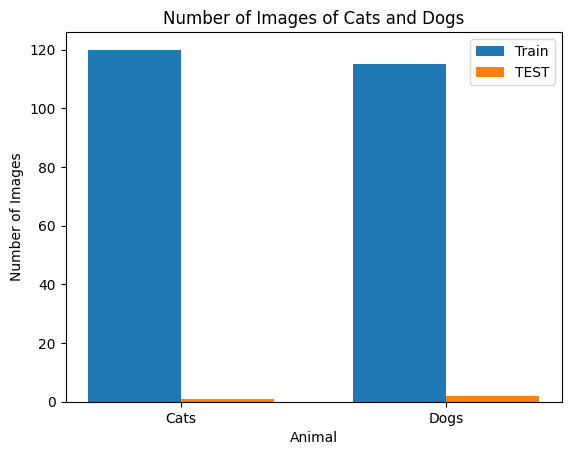

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the counts for cats and dogs in validation and train sets
cats_validation_count = len(cats_val)
dogs_validation_count = len(dog_val)
cats_train_count = len(cats_train)
dogs_train_count = len(dog_train)

# Create the labels for the x-axis
labels = ['Cats', 'Dogs']

# Create the counts for validation and train sets
validation_counts = [cats_validation_count, dogs_validation_count]
train_counts = [cats_train_count, dogs_train_count]

# Set the positions and width of the bars
positions = np.arange(len(labels))
bar_width = 0.35

# Plot the bars
plt.bar(positions - bar_width/2, train_counts, bar_width, label='Train')
plt.bar(positions + bar_width/2, validation_counts, bar_width, label='TEST')

# Set the labels and title
plt.xlabel('Animal')
plt.ylabel('Number of Images')
plt.title('Number of Images of Cats and Dogs')

# Set the x-axis tick labels
plt.xticks(positions, labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Define the root folder path
root_folder = '/content/data'

# Define the patterns to match image files
image_patterns = ['**/*.png', '**/*.jpeg', '**/*.jpg']

# Use glob.glob() to find the paths to image files with multiple extensions
image_paths = []
for pattern in image_patterns:
    image_paths.extend(glob.glob(root_folder + '/' + pattern, recursive=True))

len(image_paths)

292

In [ ]:
from PIL import Image

In [ ]:
np.array(Image.open(image_paths[0])).shape

(760, 1224, 4)

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np

# Initialize empty lists
image_heights = []
image_widths = []
image_channels = []

# Iterate over image paths
for path in image_paths:
    try:
        image = Image.open(path)
        shape = np.array(image).shape
        if len(shape) >= 3:
            height, width, channels = shape[:3]
            image_heights.append(height)
            image_widths.append(width)
            image_channels.append(channels)
        else:
            # print(f"Invalid image shape for path: {path}")
            height, width = shape[:2]
            image_heights.append(height)
            image_widths.append(width)
            image_channels.append(1)
    except (IOError, OSError) as e:
        print(f"Error opening image at path: {path}")
        # Handle the error as needed (e.g., logging, skipping the image, etc.)

# Create the DataFrame
Images_metadata = pd.DataFrame({
    'Images': image_paths,
    'Image height': image_heights,
    'Image width': image_widths,
    'Image channels': image_channels
})


In [ ]:
Images_metadata.head()

Images  Image height  \
0  /content/data/train/cat/Header_1920x380_Futter...           760   
1  /content/data/val/cat/cy93ZWJzaXRlX2NvbnRlbnQv...          1200   
2  /content/data/val/cat/cute-cat-3d-rendering-fr...           980   
3  /content/data/val/dog/2448490111_215e91bdf3_z.png          1080   
4  /content/data/val/dog/benefits_of_neutering_or...           956   

   Image width  Image channels  
0         1224               4  
1          800               4  
2          980               4  
3         1920               4  
4         1700               1

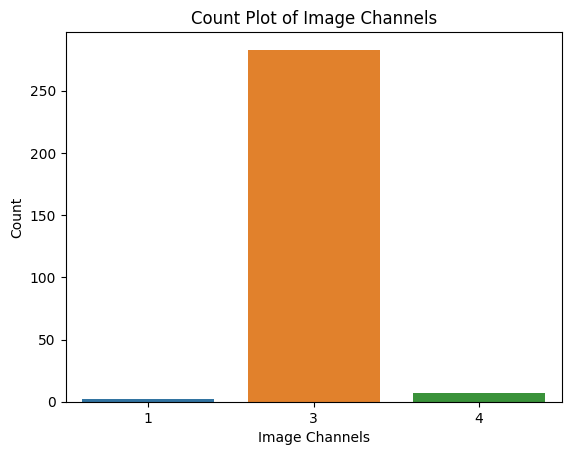

In [ ]:
import seaborn as sns

sns.countplot(x='Image channels', data=Images_metadata)
plt.xlabel('Image Channels')
plt.ylabel('Count')
plt.title('Count Plot of Image Channels')
plt.show()


In [ ]:
Images_metadata.describe()

Image height  Image width  Image channels
count    292.000000   292.000000      292.000000
mean    2253.784247  2542.434932        3.010274
std     1432.321451  1592.935145        0.226805
min      500.000000   500.000000        1.000000
25%     1067.000000  1600.000000        3.000000
50%     2036.000000  1600.000000        3.000000
75%     3261.750000  3863.750000        3.000000
max     6720.000000  8192.000000        4.000000

In [ ]:
# Define the root folder of your DDSM dataset
root_folder_s = '/content/data/train'

# Define the transformation for your dataset without normalization
transform_without_normalization_s = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Create the ImageFolder dataset for calculating mean and std
train_dataset_s = ImageFolder(root=root_folder_s, transform=transform_without_normalization_s)

# Create a DataLoader for the training dataset
train_dataloader_s = DataLoader(train_dataset_s, batch_size=64, shuffle=True)

# Calculate the mean and standard deviation
mean_s = 0.
std_s = 0.
total_samples_s = 0

for images_s, _ in train_dataloader_s:
    batch_samples_s = images_s.size(0)
    images_s = images_s.view(batch_samples_s, images_s.size(1), -1)
    mean_s += images_s.mean(2).sum(0)
    std_s += images_s.std(2).sum(0)
    total_samples_s += batch_samples_s

mean_s /= total_samples_s
std_s /= total_samples_s

print("Mean:", mean_s)
print("Standard Deviation:", std_s)


Mean: tensor([0.5341, 0.5063, 0.4630])
Standard Deviation: tensor([0.2098, 0.2081, 0.2181])


##DATA Loaders

For Training and Validation data

In [ ]:
# Define the root folder of your DDSM dataset
root_folder = '/content/data/train'

# Define the transformations to be applied to the images
def convert_channels(image):
    image = np.array(image)
    if image.shape[2] == 4:  # If image has 4 channels (RGBA), convert it to RGB
        image = image[:, :, :3]
    elif image.shape[2] == 1:  # If image has 1 channel (grayscale), convert it to RGB
        image = np.concatenate([image] * 3, axis=2)
    return Image.fromarray(image)


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(convert_channels),  # Custom transform to handle 4 or 1 channel images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5341, 0.5063, 0.4630], std=[0.2098, 0.2081, 0.2181])
])


# Create the ImageFolder dataset
dataset = ImageFolder(root=root_folder, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
valid_size = len(dataset) - train_size  # Remaining 20% for validation
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Create the DataLoader for training
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the DataLoader for validation
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=False)


For test Data

In [ ]:
# Define the root folder of your DDSM dataset
root_folder = '/content/data/val'

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(convert_channels),  # Custom transform to handle 4 or 1 channel images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5341, 0.5063, 0.4630], std=[0.2098, 0.2081, 0.2181])
])


# Create the ImageFolder dataset
dataset_test = ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader for training
test_dataloader = DataLoader(dataset_test, batch_size=1)


In [ ]:
np.array(Image.open(image_paths[0])).shape

(760, 1224, 4)

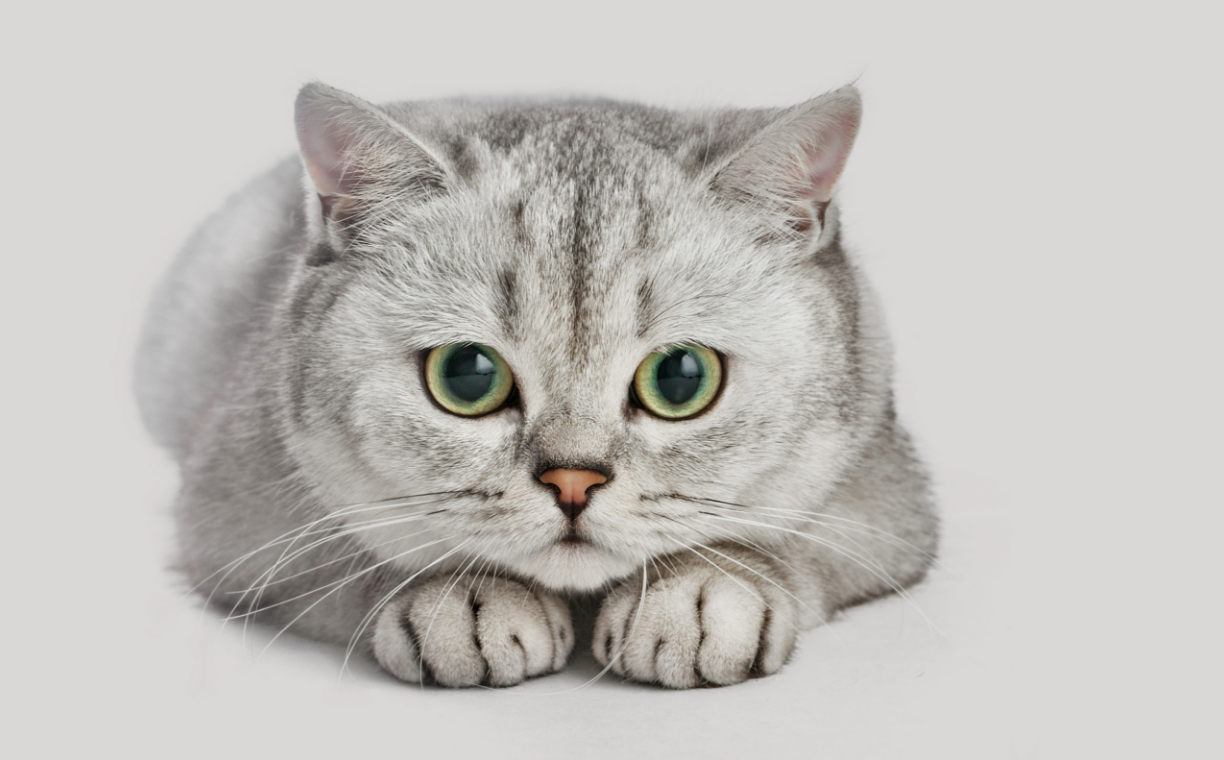

In [ ]:
im = np.array(Image.open(image_paths[0]))[:, :, :3]
im = Image.fromarray(im)
im.show()

#Model Architecture

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))

        x = x.view(-1, 512 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


#Training

In [ ]:
from tqdm import tqdm

In [ ]:
# Set the device to run on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

model = model.to(device=device)

def train(num_epoch, model):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(0, num_epoch):
        model.train()
        loop = tqdm(enumerate(train_dataloader), total=len(train_dataloader))
        running_loss = 0.0
        corrects = 0
        total = 0

        for batch_idx, (data, targets) in loop:
            data = data.to(device=device)
            targets = targets.to(device=device)
            scores = model(data)

            loss = criterion(scores, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _, preds = torch.max(scores, 1)

            running_loss += loss.item() * data.size(0)
            corrects += torch.sum(preds == targets.data)
            total += targets.size(0)

            loop.set_description(f"Epoch {epoch+1}/{num_epoch}")


        # Calculate training loss and accuracy
        epoch_loss = running_loss / len(train_dataset)
        train_accuracy = corrects.double() / total

        # Validation
        model.eval()
        val_loss = 0.0
        val_corrects = 0.0
        with torch.no_grad():
            for val_data, val_targets in valid_dataloader:
                val_data = val_data.to(device=device)
                val_targets = val_targets.to(device=device)
                val_scores = model(val_data)
                val_batch_loss = criterion(val_scores, val_targets)
                val_loss += val_batch_loss.item() * val_data.size(0)
                _, val_preds = torch.max(val_scores, 1)
                val_corrects += torch.sum(val_preds == val_targets.data)

        val_loss = val_loss / len(valid_dataset)
        val_accuracy = val_corrects.double() / len(valid_dataset)

        # loop.set_postfix(epoch_loss=epoch_loss, train_accuracy=train_accuracy,
        #                  val_loss=val_loss, val_accuracy=val_accuracy)

        print("Training Loss: {:.4f}".format(epoch_loss),"Validation Loss: {:.4f}".format(val_loss))
        print("Trai Accuracy: {:.4f}".format(train_accuracy),"Validatio Accuracy: {:.4f}".format(val_accuracy))


        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())


        # Save model
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, 'checkpoint_epoch_' + str(epoch) + '.pt')

    # Plotting curves
    plt.plot(range(1, num_epoch+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epoch+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.plot(range(1, num_epoch+1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epoch+1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()


Epoch 1/20: 100%|██████████| 13/13 [01:04<00:00,  4.98s/it]


Training Loss: 0.6942 Validation Loss: 0.6919
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 2/20: 100%|██████████| 13/13 [00:46<00:00,  3.59s/it]


Training Loss: 0.6940 Validation Loss: 0.6919
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 3/20: 100%|██████████| 13/13 [00:45<00:00,  3.51s/it]


Training Loss: 0.6939 Validation Loss: 0.6920
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 4/20: 100%|██████████| 13/13 [00:45<00:00,  3.48s/it]


Training Loss: 0.6938 Validation Loss: 0.6921
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 5/20: 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


Training Loss: 0.6936 Validation Loss: 0.6922
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 6/20: 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


Training Loss: 0.6935 Validation Loss: 0.6922
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 7/20: 100%|██████████| 13/13 [00:43<00:00,  3.38s/it]


Training Loss: 0.6934 Validation Loss: 0.6923
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 8/20: 100%|██████████| 13/13 [00:44<00:00,  3.44s/it]


Training Loss: 0.6933 Validation Loss: 0.6924
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 9/20: 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


Training Loss: 0.6931 Validation Loss: 0.6924
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5294


Epoch 10/20: 100%|██████████| 13/13 [00:43<00:00,  3.34s/it]


Training Loss: 0.6932 Validation Loss: 0.6925
Trai Accuracy: 0.4752 Validatio Accuracy: 0.5294


Epoch 11/20: 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


Training Loss: 0.6930 Validation Loss: 0.6926
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5098


Epoch 12/20: 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


Training Loss: 0.6929 Validation Loss: 0.6927
Trai Accuracy: 0.4802 Validatio Accuracy: 0.5098


Epoch 13/20: 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


Training Loss: 0.6928 Validation Loss: 0.6927
Trai Accuracy: 0.4703 Validatio Accuracy: 0.4706


Epoch 14/20: 100%|██████████| 13/13 [00:44<00:00,  3.45s/it]


Training Loss: 0.6927 Validation Loss: 0.6928
Trai Accuracy: 0.5000 Validatio Accuracy: 0.5098


Epoch 15/20: 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


Training Loss: 0.6926 Validation Loss: 0.6929
Trai Accuracy: 0.5297 Validatio Accuracy: 0.6078


Epoch 16/20: 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


Training Loss: 0.6926 Validation Loss: 0.6930
Trai Accuracy: 0.5693 Validatio Accuracy: 0.5294


Epoch 17/20: 100%|██████████| 13/13 [00:43<00:00,  3.31s/it]


Training Loss: 0.6924 Validation Loss: 0.6930
Trai Accuracy: 0.6089 Validatio Accuracy: 0.5882


Epoch 18/20: 100%|██████████| 13/13 [00:43<00:00,  3.35s/it]


Training Loss: 0.6924 Validation Loss: 0.6931
Trai Accuracy: 0.6089 Validatio Accuracy: 0.5686


Epoch 19/20: 100%|██████████| 13/13 [00:43<00:00,  3.35s/it]


Training Loss: 0.6923 Validation Loss: 0.6931
Trai Accuracy: 0.6188 Validatio Accuracy: 0.5098


Epoch 20/20: 100%|██████████| 13/13 [00:45<00:00,  3.48s/it]


Training Loss: 0.6922 Validation Loss: 0.6932
Trai Accuracy: 0.5941 Validatio Accuracy: 0.4902


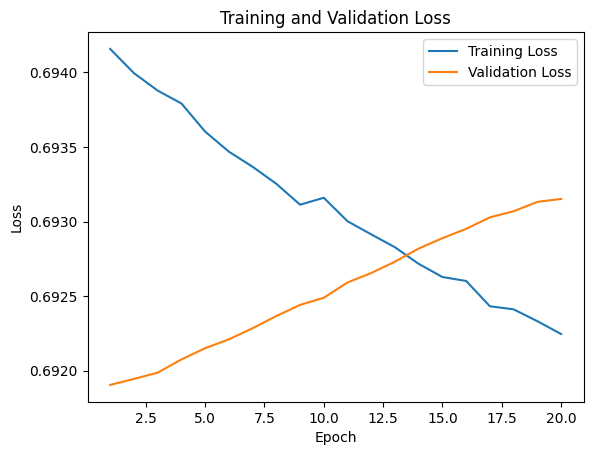

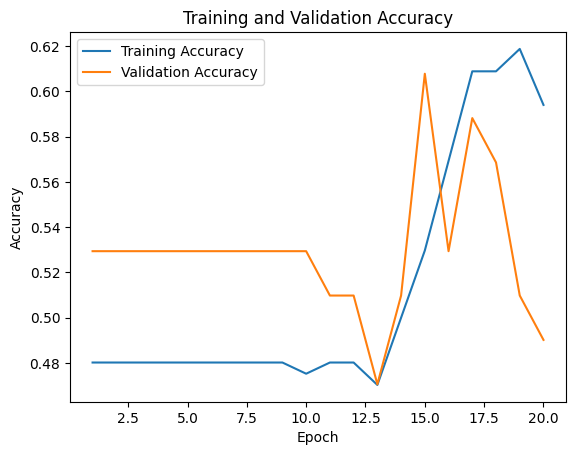

In [ ]:
train(20, model)

#TEST

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [ ]:
checkpoint = torch.load('/content/checkpoint_epoch_16.pt')  # Load the saved checkpoint file

model = SimpleCNN()  # Create an instance of the model
model.load_state_dict(checkpoint['model_state_dict'])  # Load the model's state dictionary

optimizer = optim.SGD(model.parameters(), lr=0.001)  # Create an instance of the optimizer
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Load the optimizer's state dictionary

In [ ]:
def test(test_loader, model):
    model.to(device)
    model.eval()
    test_loss = 0
    correct = 0

    true_output = []
    pred_output = []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            true_output.append(y.item())

            output = model(x)
            _, predictions = torch.max(output, 1)
            pred_output.append(predictions.item())

            correct += (predictions == y).sum().item()
            test_loss += criterion(output, y)

            # Display the image, predicted label, and actual label
            for i in range(len(x)):
                if i%2 == 0:
                    image = x[i].cpu().numpy()
                    predicted_label = predictions[i].item()
                    actual_label = y[i].item()

                    plt.imshow(np.transpose(image, (1, 2, 0)))
                    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")

                    plt.show()

    test_loss /= len(test_loader.dataset)

    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")

    Confusion_matrix = confusion_matrix(true_output, pred_output)
    report = classification_report(true_output, pred_output)
    F1_score = f1_score(true_output, pred_output, average='macro')

    print('F1 Score is: {}'.format(F1_score))
    print('Classification_Report Score is: {}'.format(report))


    fig = plt.figure(figsize=(15,5))
    sns.heatmap(Confusion_matrix, annot=True, cmap='Blues')
    plt.show()


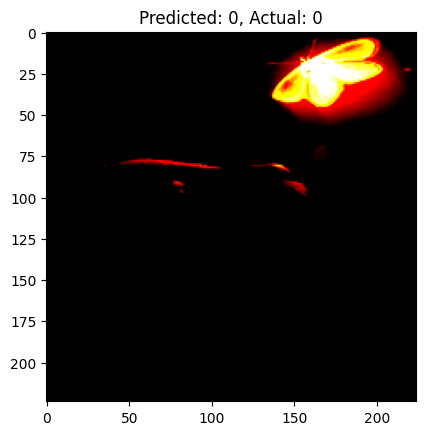

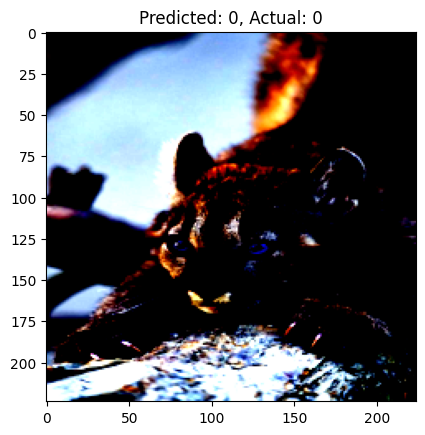

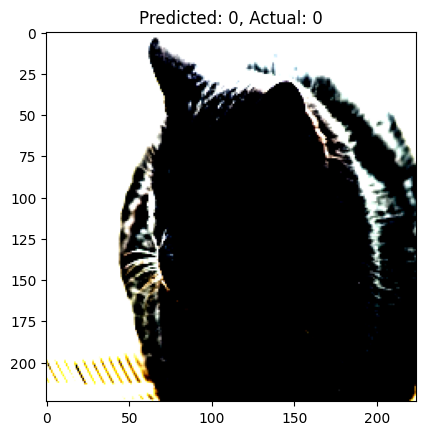

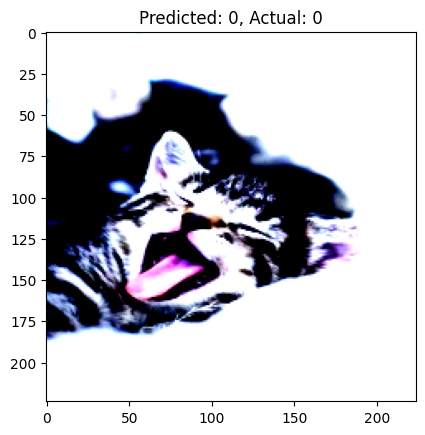

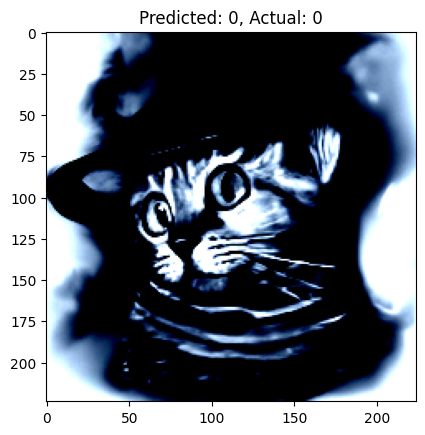

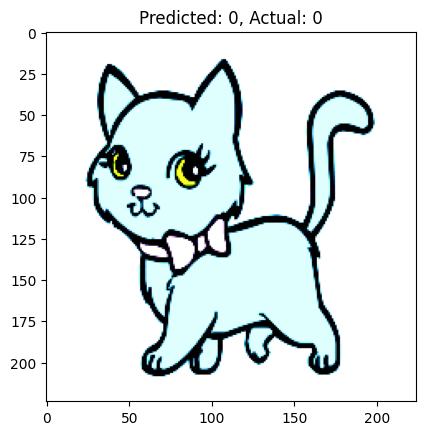

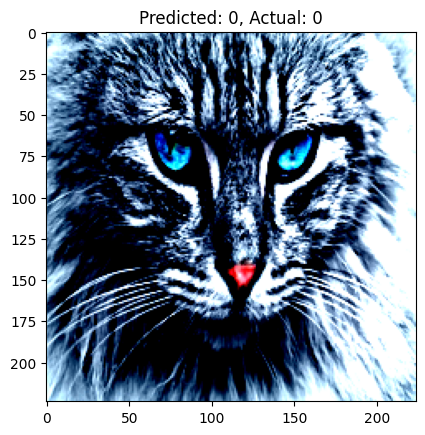

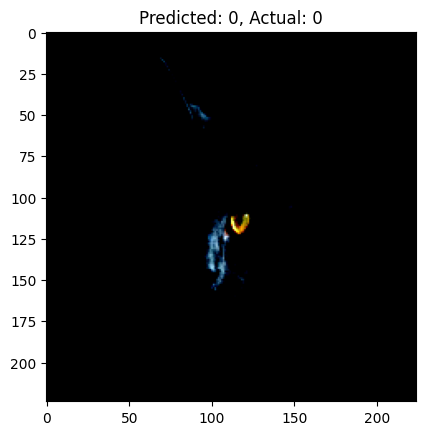

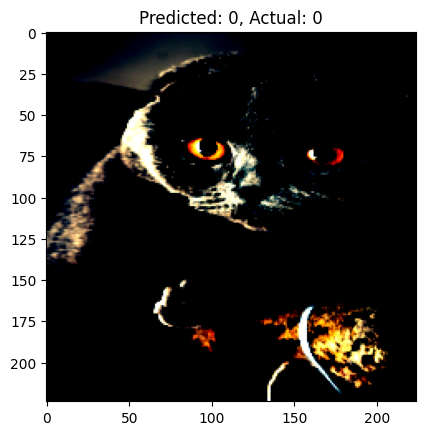

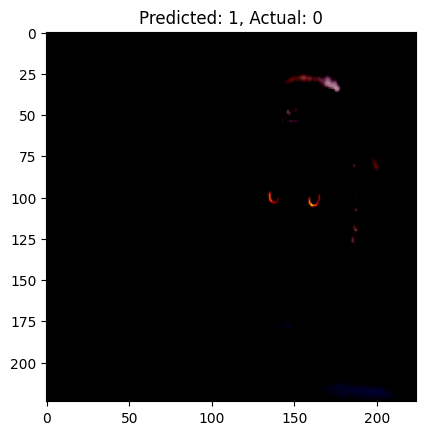

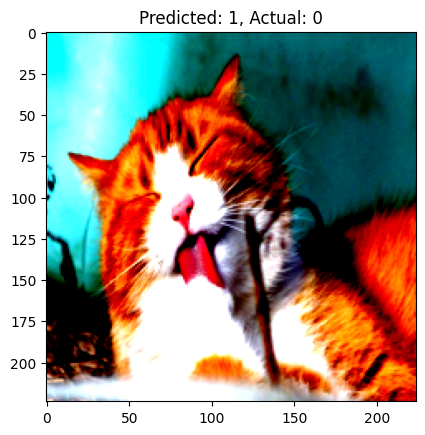

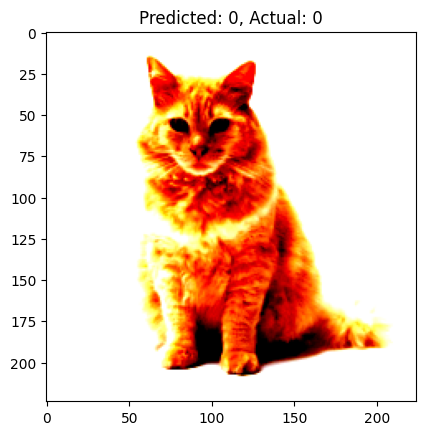

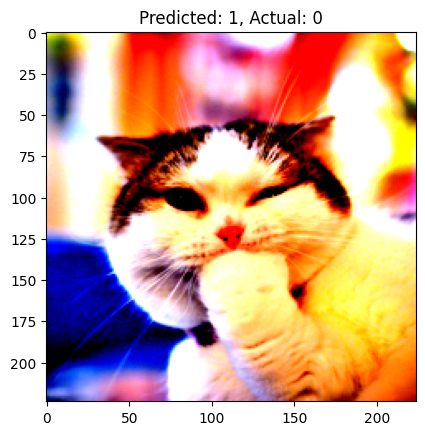

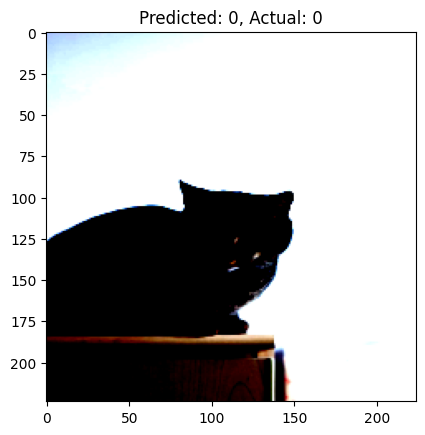

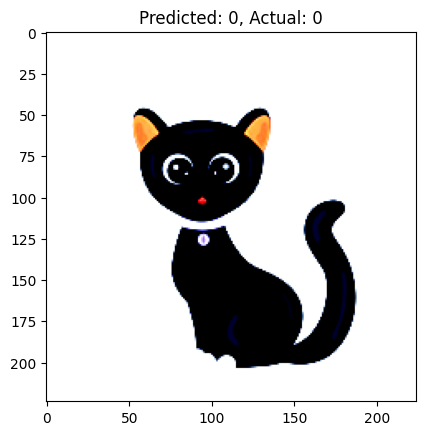

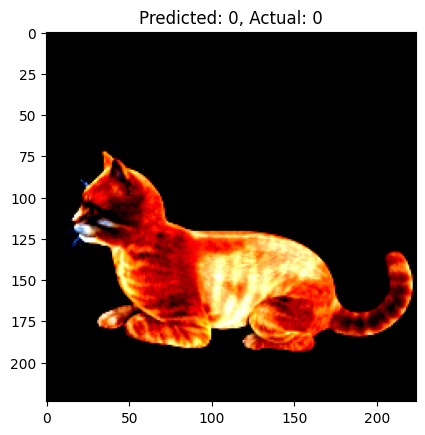

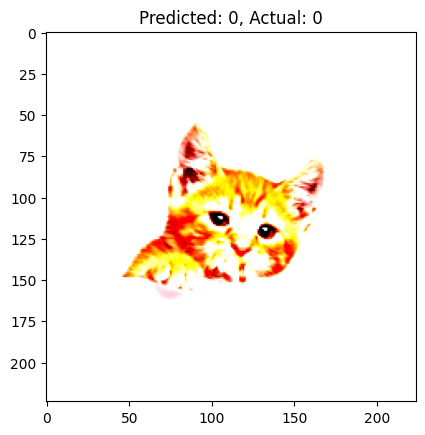

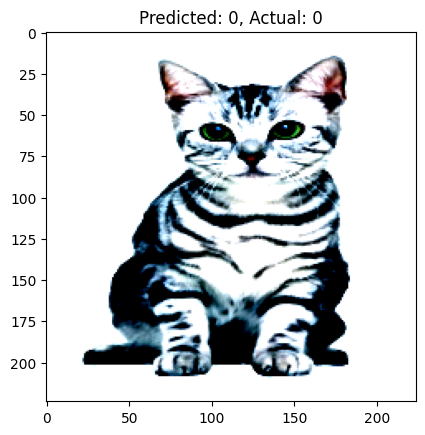

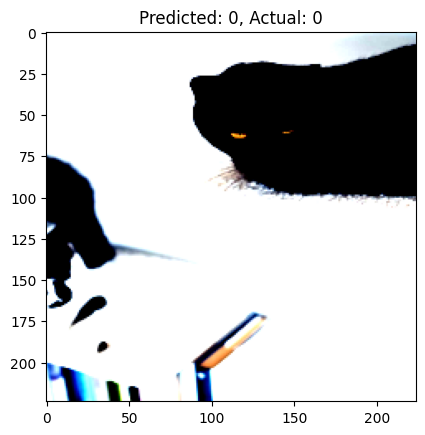

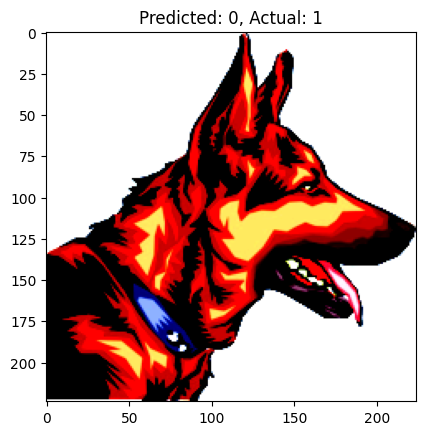

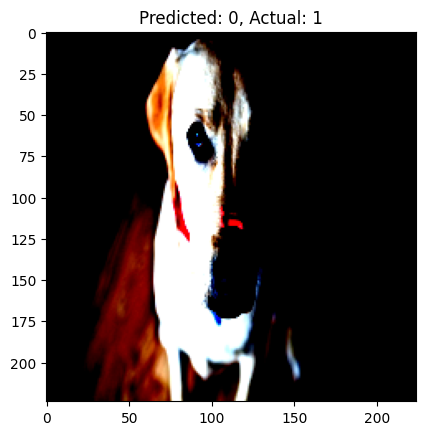

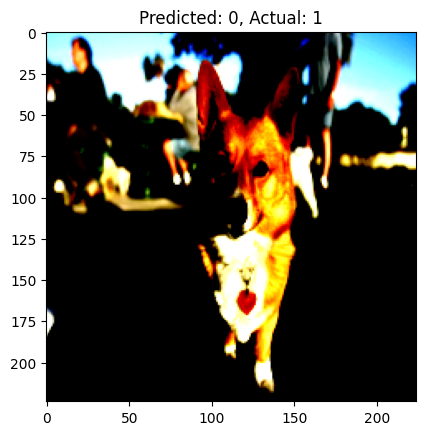

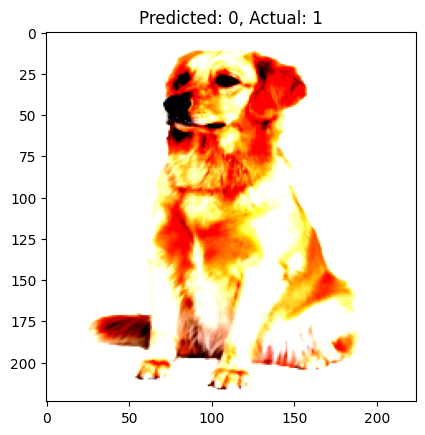

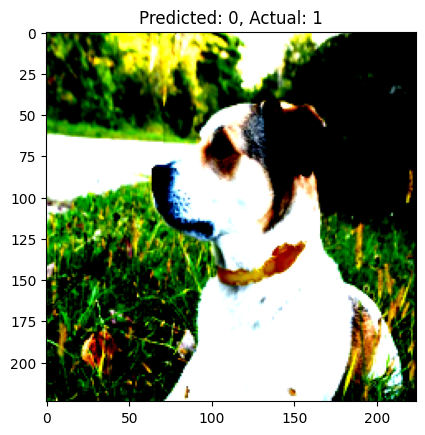

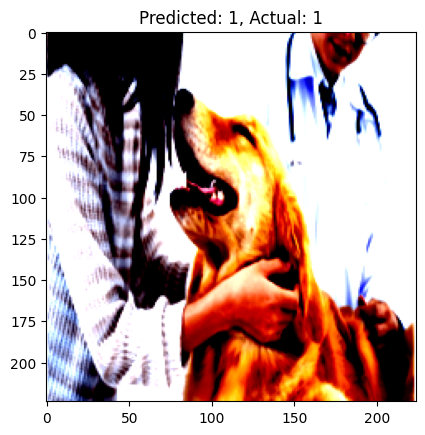

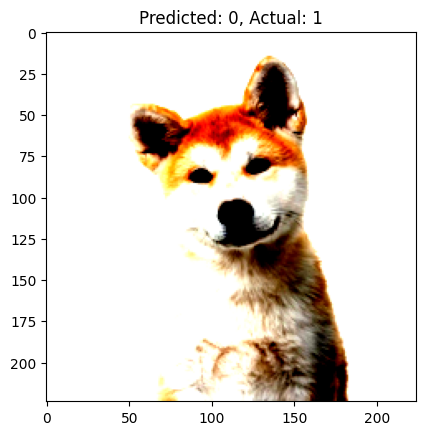

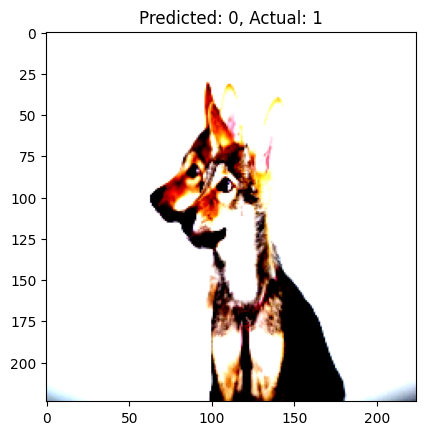

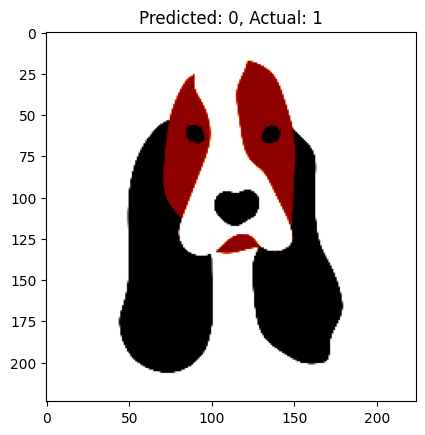

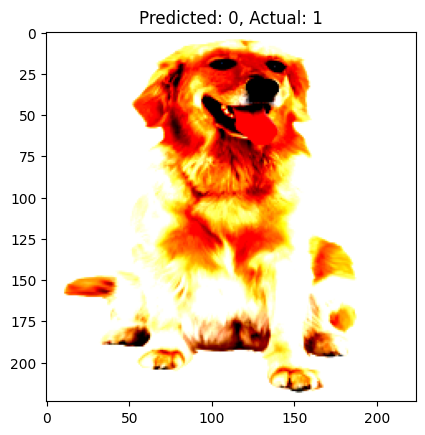

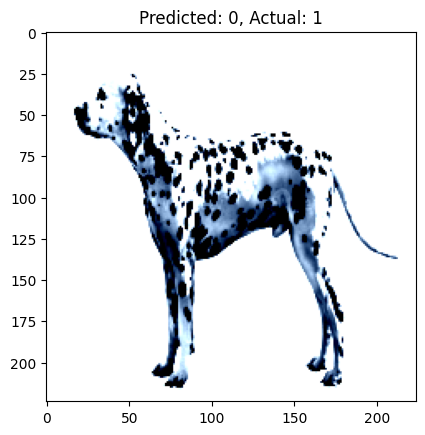

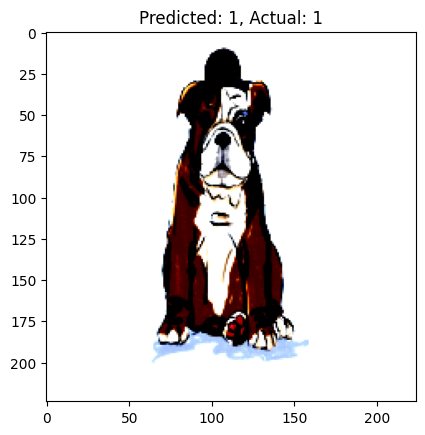

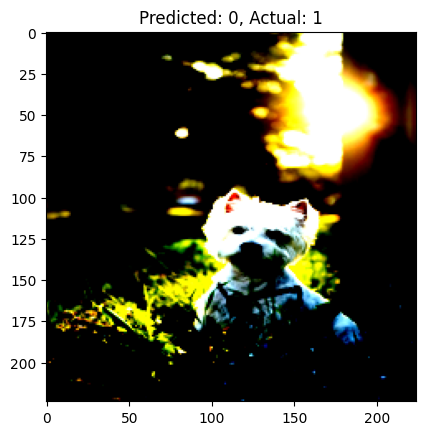

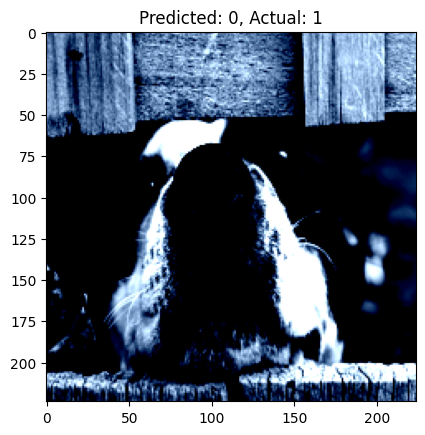

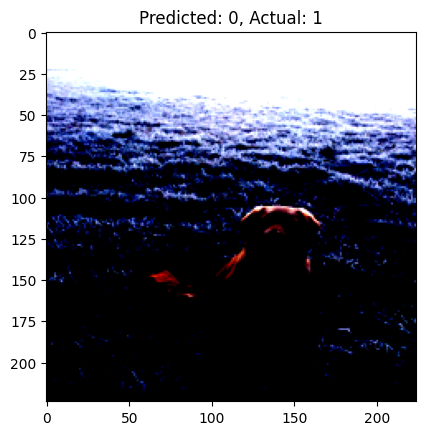

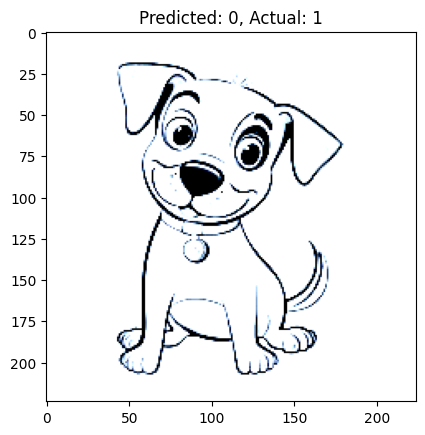

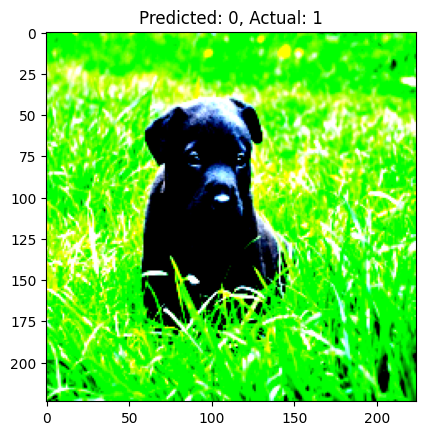

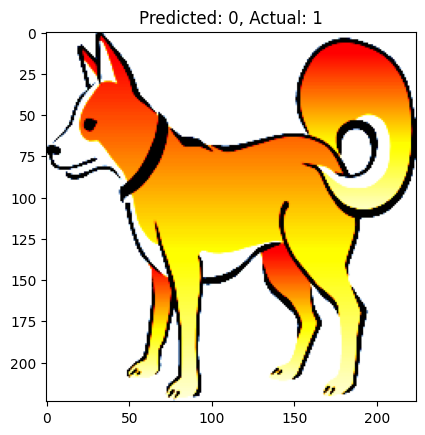

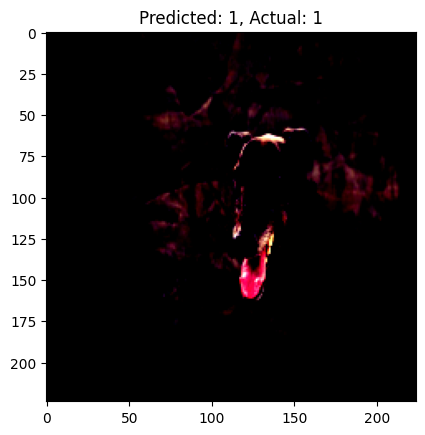

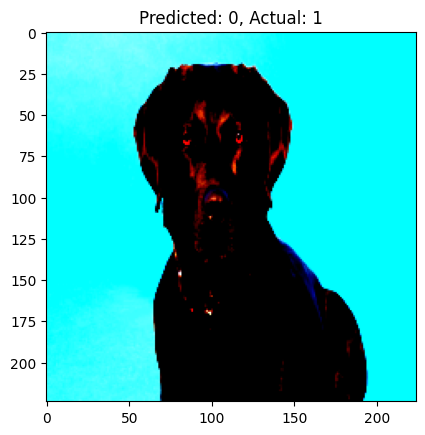

Average Loss:  tensor(0.6936, device='cuda:0')   Accuracy:  19  /  39    48 %
F1 Score is: 0.4230769230769231
Classification_Report Score is:               precision    recall  f1-score   support

           0       0.48      0.84      0.62        19
           1       0.50      0.15      0.23        20

    accuracy                           0.49        39
   macro avg       0.49      0.50      0.42        39
weighted avg       0.49      0.49      0.42        39



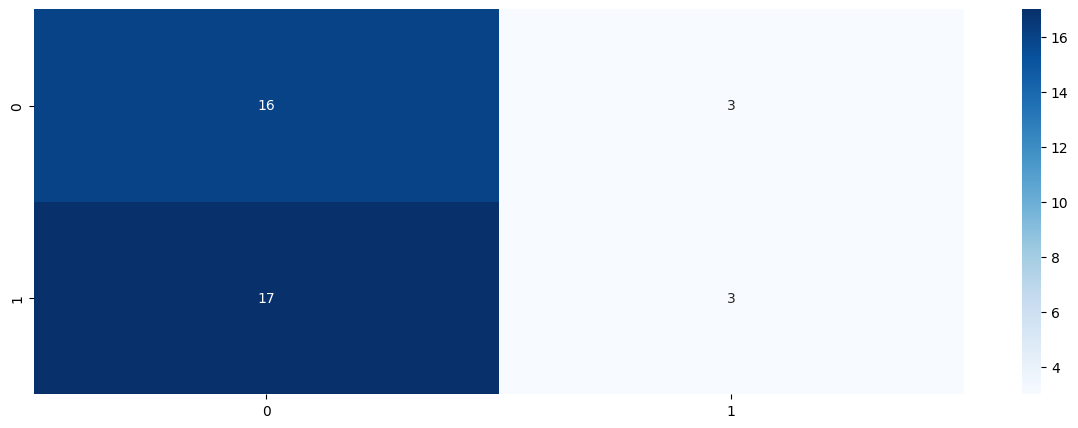

In [ ]:
test(test_dataloader,model)

#Sigle Image INferece

In [ ]:
def ImagePrediction(filepath, model):
    img_array = Image.open(filepath).convert("RGB")
    img_array.show()

    data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(convert_channels),  # Custom transform to handle 4 or 1 channel images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5341, 0.5063, 0.4630], std=[0.2098, 0.2081, 0.2181])
    ])

    img = data_transforms(img_array).unsqueeze(dim=0) # Returns a new tensor with a dimension of size one inserted at the specified position.
    load = DataLoader(img)

    for x in load:
        x=x.to(device)
        pred = model(x)
        _, preds = torch.max(pred, 1)
        print(f"class : {preds}")
        if preds[0] == 1: print(f"predicted ----> Dog")
        else: print(f"predicted ----> Cat")

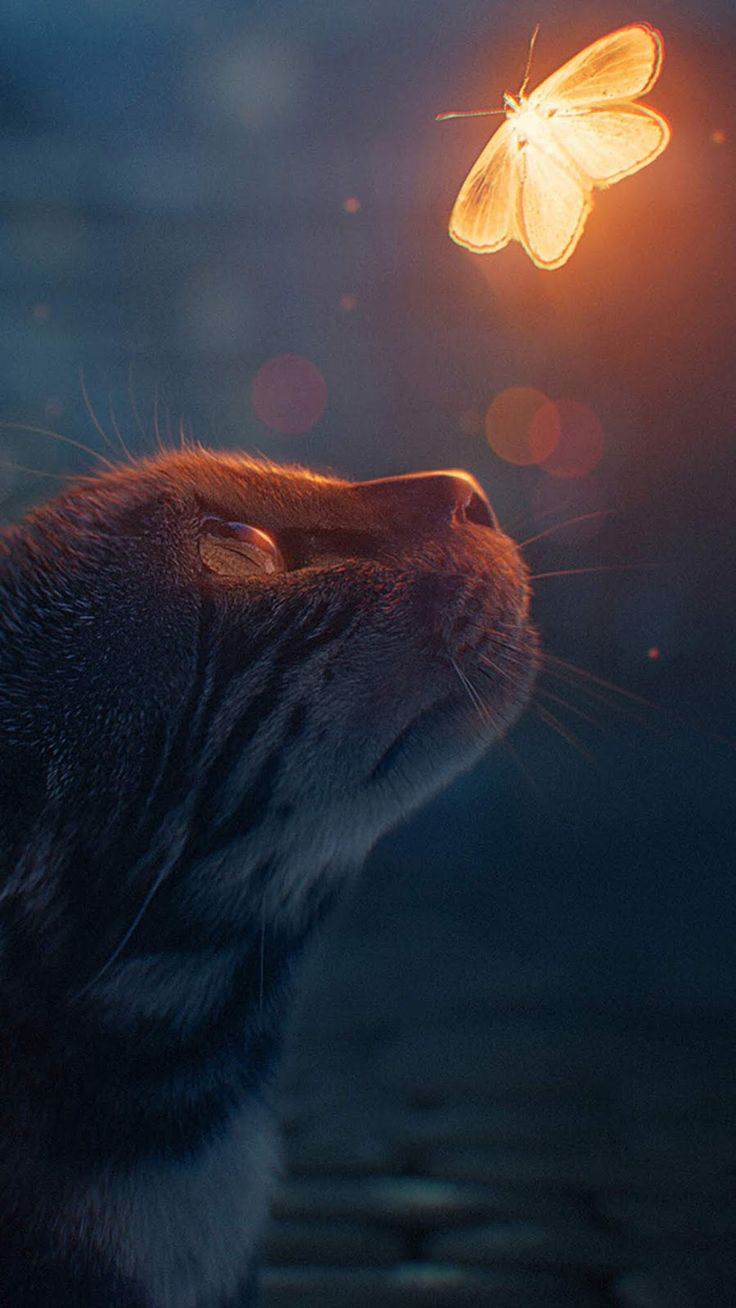

class : tensor([0], device='cuda:0')
predicted ----> Cat


In [ ]:
img_path = '/content/data/val/cat/08a2f0101c5e7a3d11b03c7b5e78c353.jpg'

ImagePrediction(img_path,model)